# Long Run Analysis

In [1]:
def evaluate_run(prefix = 0, folder='./'):
    p = Path(folder)
    filefilter = f'{prefix}_*.output'
#     print(filefilter)
    filenames = list(p.glob(filefilter))

    assert(len(filenames) > 0)

    fitness = []
    pop = []
    dist = []
    for filename in filenames:
#         print(filename)
        fid  = open(filename, 'r')
        lines = fid.readlines() 
        for line in lines:
            if 'BEST' in line:
                fitness.append(eval(line.split('-')[1]))
                pop.append(eval(line.split(' - ')[2]))
            if 'HIST' in line:
                dist.append(eval(line.split('-')[1]))

    fitness = np.array(fitness)
    fitness = list(fitness[:,0])
    fitness.sort(reverse=True)
    plt.plot(fitness)
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    return fitness, pop, dist

In [2]:
from see import DataDownload as dd
imagefiles = []
maskfiles = []
outputfiles = []

print("Adding COSKEL Data")
files = dd.getCOSKELFolderlists(folder='./Image_Data/', outputfolder='./Image_Data/Output/')
imagefiles += files[0]
maskfiles += files[1]
outputfiles += files[2]

print("Adding Sky Data")
files = dd.getSkyFolderLists(folder='./Image_Data/', outputfolder='./Image_Data/Output/')
imagefiles += files[0]
maskfiles += files[1]
outputfiles += files[2]

Adding COSKEL Data
Adding Sky Data


./Image_Data//sky/data/0001.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
./Image_Data//sky/data/0002.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
./Image_Data//sky/data/0003.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
./Image_Data//sky/data/0004.jpg
./Image_Data//sky/data/0005.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial

/opt/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/opt/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/opt/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


trivial solution
trivial solution
trivial solution
trivial solution


/opt/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:265: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v


trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
./Image_Data//sky/data/0017.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
./Image_Data//sky/data/0020.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
./Image_Data//sky/data/0024.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
tri

trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
./Image_Data//sky/data/0090.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
./Image_Data//sky/data/0092.jpg
trivial solution
./Image_Data//sky/data/0093.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
./Image_Data//sky/data/0095.jpg
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivial solution
trivi

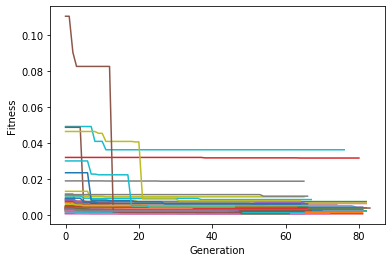

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from pathlib import Path

import imageio
from see import Segmentors
from see import JupyterGUI


folder = 'Image_Data/Output/'


#Sky Data
skyrange = list(range(408))[-60:]

allresults = []

for index in skyrange:
    print(f"{index} - {imagefiles[index]}")
    fitness_list, pop, dist = evaluate_run(index, folder=folder)
    params = pop[-1]
    seg = Segmentors.algoFromParams(params)
    results = []
    for test in skyrange:
        img = imageio.imread(imagefiles[test])
        gmask = imageio.imread(maskfiles[test])
        mask = seg.evaluate(img)
        fitness,_,_ = Segmentors.FitnessFunction(mask,gmask)
        results.append(fitness)
    allresults.append(results)


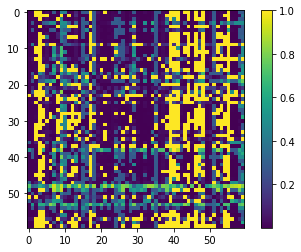

In [40]:
allre = np.array(allresults)
plt.imshow(allre)
plt.colorbar()

In [41]:
np.save('allre.npy', allre) # save
allre = np.load('allre.npy') # loa

In [42]:
np.sum(allre < 0.1)

1791

In [49]:
total = np.sum(allre < 0.1 ,axis=1)/60 * 100
total

array([58.33333333, 65.        , 63.33333333, 40.        , 58.33333333,
       56.66666667, 60.        , 55.        , 68.33333333, 15.        ,
       58.33333333, 55.        , 58.33333333, 38.33333333, 65.        ,
       55.        , 38.33333333, 40.        , 30.        , 31.66666667,
       50.        , 51.66666667, 43.33333333, 20.        , 53.33333333,
       51.66666667, 68.33333333, 61.66666667, 51.66666667, 60.        ,
       55.        , 55.        , 56.66666667, 63.33333333, 60.        ,
       63.33333333, 53.33333333, 45.        , 25.        , 51.66666667,
       43.33333333, 60.        , 60.        , 61.66666667, 55.        ,
       48.33333333, 60.        , 58.33333333,  6.66666667, 23.33333333,
       60.        , 45.        , 48.33333333, 18.33333333, 41.66666667,
       63.33333333, 60.        , 25.        , 51.66666667, 45.        ])

In [44]:
index_min = np.argmax(total)
index_min

8

In [45]:
best = np.max(total)
best

41

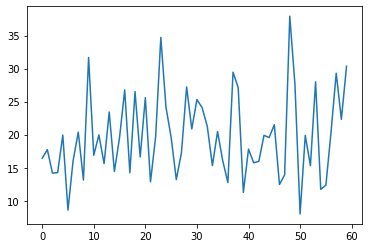

In [46]:
plt.plot(np.sum(allre, axis=1))